In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


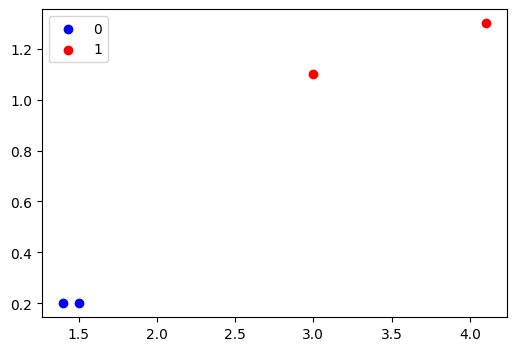

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt

iris = np.genfromtxt('/content/drive/Othercomputers/My Laptop/Advanced/D-Learning/231004/logistic/iris_2D_demo.csv',
                     dtype=None,
                     delimiter=',',
                     skip_header=1)
x_data = iris[:, :2]
y_data = iris[:, 2]

x_data_0 = x_data[y_data == 0]
x_data_1 = x_data[y_data == 1]

plt.figure(figsize=(6, 4))
plt.scatter(x_data_0[:, 0], x_data_0[:, 1], color='b', label='0')
plt.scatter(x_data_1[:, 0], x_data_1[:, 1], color='r', label='1')
plt.legend()

In [3]:
N = x_data.shape[0]
intercept = np.ones((N , 1))
x_data = np.concatenate((intercept, x_data), axis=1)

print('x_data \n', x_data)
print('y_data \n', y_data)

x_data 
 [[1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  3.  1.1]
 [1.  4.1 1.3]]
y_data 
 [0. 0. 1. 1.]


In [4]:
def shuffle_data(X, y):
    indices = np.random.permutation(N)
    x_data_sh = x_data[indices]
    y_data_sh = y_data[indices]

    return x_data_sh, y_data_sh

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return -y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

def predict(X, theta):
    z = np.dot(X.T, theta)
    y_hat = sigmoid_function(z)

    return y_hat

In [5]:
lr = 0.001
max_epoch = 30000

theta = np.array([0.1, 0.5, -0.1])
losses = []

for epoch in range(max_epoch):
    # shuffle
    x_data_sh, y_data_sh = shuffle_data(x_data, y_data)

    for i in range(N):
        X = x_data_sh[i]
        y = y_data_sh[i]

        # compute output
        y_hat = predict(X, theta)

        # compute loss
        loss = loss_function(y_hat, y)
        losses.append(loss.item())

        # compute mean of gradient
        gradient = X*(y_hat - y)

        # update
        theta = theta - lr*gradient

In [6]:
lr = 0.01
max_epoch = 1

theta = np.array([0.1, 0.5, -0.1])
losses = []

for epoch in range(max_epoch):
    for i in range(N):
        X = x_data[i]
        y = y_data[i]
        print(f'X: {X}')
        print(f'y: {y}')

        # compute output
        y_hat = predict(X, theta)
        print(f'y_hat: {y_hat}')

        # compute loss
        loss = loss_function(y_hat, y)
        losses.append(loss.item())
        print(f'loss: {loss}')

        # compute mean of gradient
        gradient = X*(y_hat - y)
        print(f'gradient: {gradient}')

        # update
        theta = theta - lr*gradient
        print(f'theta: {theta}')

        break

X: [1.  1.4 0.2]
y: 0.0
y_hat: 0.6856801139382539
loss: 1.1573440662232617
gradient: [0.68568011 0.95995216 0.13713602]
theta: [ 0.0931432   0.49040048 -0.10137136]


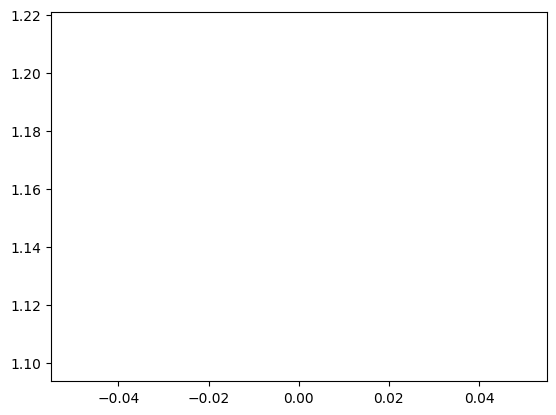

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [8]:
theta

array([ 0.0931432 ,  0.49040048, -0.10137136])

In [9]:
# compute acc
preds = []
for i in range(0, N):
    X = x_data[i]
    y = y_data[i]

    y_hat = predict(X, theta).round()
    preds.append(y_hat)

In [10]:
acc = (preds == y_data).mean()
print(acc)

0.5


In [11]:
preds

[1.0, 1.0, 1.0, 1.0]

In [12]:
y_data

array([0., 0., 1., 1.])